In [18]:
import numpy as np
import math
import qiskit
from qiskit import QuantumCircuit, transpile, execute
from qiskit import IBMQ, Aer
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit.tools.monitor import job_monitor

%matplotlib inline

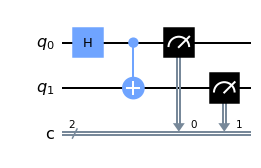

In [5]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0, 1], [0, 1])

circuit.draw("mpl")

In [8]:
IBMQ.load_account()
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [13]:
# actual quantum computers
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 3 queued and simulated qubits
ibmq_armonk has 2 queued and 1 qubits
ibmq_santiago has 1 queued and 5 qubits
ibmq_bogota has 12 queued and 5 qubits
ibmq_lima has 3 queued and 5 qubits
ibmq_belem has 7 queued and 5 qubits
ibmq_quito has 15 queued and 5 qubits
simulator_statevector has 2 queued and simulated qubits
simulator_mps has 2 queued and simulated qubits
simulator_extended_stabilizer has 2 queued and simulated qubits
simulator_stabilizer has 2 queued and simulated qubits
ibmq_manila has 1 queued and 5 qubits


In [19]:
# setting up and monitor job status
backend = provider.get_backend("ibmq_santiago")
job = execute(circuit, backend=backend, shots=1024)
job_monitor(job)

Job Status: job has successfully run


In [20]:
results = job.result()
counts = results.get_counts(circuit)
counts

{'00': 435, '01': 22, '10': 23, '11': 544}